In [ ]:
import torch
import torch.nn.functional as F



Output shape: torch.Size([2, 8, 64])


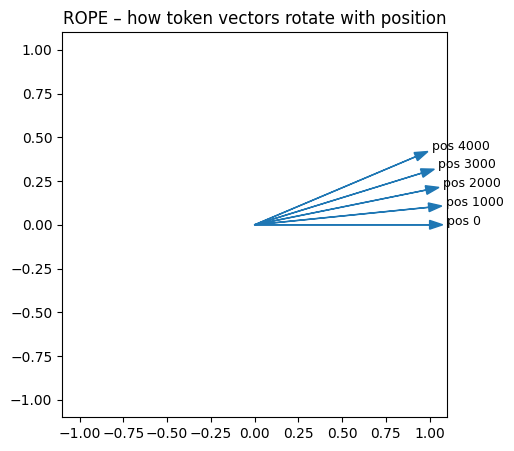

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def rope_rotate(vec, position, base=10000):
    """
    Simplified Rotary Positional Encoding for a 2D vector.
    """
    # angle depends on position
    theta = position / base
    c, s = np.cos(theta), np.sin(theta)

    # rotation matrix [[c, -s], [s, c]]
    rot = np.array([[c, -s], [s, c]])
    return rot @ vec  # matrix multiply


# start with a simple vector (1, 0)
vec = np.array([1, 0])

# rotate it for several positions
positions = range(0, 5000, 1000)
rotated = [rope_rotate(vec, p) for p in positions]

# plot
plt.figure(figsize=(5, 5))
for i, v in enumerate(rotated):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, color="C0")
    plt.text(v[0] * 1.1, v[1] * 1.1, f"pos {positions[i]}", fontsize=9)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect("equal")
plt.title("ROPE – how token vectors rotate with position")
plt.show()

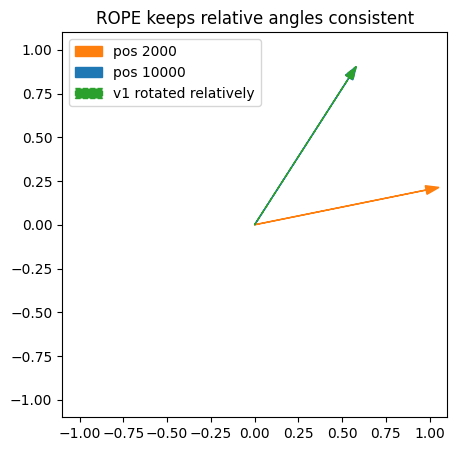

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def rope_rotate(vec, position, base=10000):
    theta = position / base
    c, s = np.cos(theta), np.sin(theta)
    rot = np.array([[c, -s], [s, c]])
    return rot @ vec


# start vector
vec = np.array([1, 0])

# choose two positions far apart
p1, p2 = 2000, 10000
v1 = rope_rotate(vec, p1)
v2 = rope_rotate(vec, p2)

# relative rotation = how much to move from v1 to v2
relative_theta = (p2 - p1) / 10000
c, s = np.cos(relative_theta), np.sin(relative_theta)
rel_rot = np.array([[c, -s], [s, c]])
v1_to_v2 = rel_rot @ v1

plt.figure(figsize=(5, 5))

# draw both vectors
plt.arrow(0, 0, v1[0], v1[1], head_width=0.05, color="C1", label=f"pos {p1}")
plt.arrow(0, 0, v2[0], v2[1], head_width=0.05, color="C0", label=f"pos {p2}")

# show that applying relative rotation moves v1 to v2
plt.arrow(
    0,
    0,
    v1_to_v2[0],
    v1_to_v2[1],
    head_width=0.05,
    color="C2",
    linestyle="--",
    label="v1 rotated relatively",
)

plt.legend()
plt.gca().set_aspect("equal")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title("ROPE keeps relative angles consistent")
plt.show()